In [2]:
import fwiVis.fwiVis as fv
import s3fs
s3 = s3fs.S3FileSystem(anon=False)
from math import cos, asin, sqrt
import re

import numpy as np
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
import os
import rioxarray as rio
import xarray as xr
import rasterio
import glob
from geocube.api.core import make_geocube
from shapely.errors import ShapelyDeprecationWarning
from shapely.geometry import Point
import warnings
import folium
import datetime
import time
from folium import plugins
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

# Ran pip install html2imag

In [2]:
import imgkit

In [3]:
big_fires = ['549', '640', '638', '551']


fireID = big_fires[0]
gdf = fv.load_large_fire(fireID, year = "2023", path_region="QuebecGlobalNRT")
gdf['timediff'] = gdf.t.astype("datetime64[ns]") - pd.to_datetime("2021-08-14 18:00:00")
gdf['timediff'] = gdf.timediff.astype("int")
gdf.t.astype("datetime64[ns]")
gdf = gdf.sort_values(by = ["t"], ascending = False)
gdf["t"] = gdf["t"].astype("str")
print(gdf.t)
m = gdf.explore(
            column='timediff', 
            cmap='autumn_r',
            style_kwds={'fillOpacity':0})
w = folium.WmsTileLayer(url='https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi',
                        layers='MODIS_Aqua_CorrectedReflectance_TrueColor',
                        attr="NASA EOSDIS GIBS",
                        fmt = 'image/png',
                        name = 'MODIS Aqua truecolor',
                        overlay = True,
                        control = True,
#                        show = opshow,
                        TIME='2023-06-02',
                        )
w.add_to(m)
folium.LayerControl().add_to(m)

#legend = LegendControl({"low":"#FAA", "medium":"#A55", "High":"#500"}, name="Legend", position="bottomright")
#m.add_control(legend)
m.save('qubec_' + big_fires[1] + '.html')
m

/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:566: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['lon'] = gdf.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:567: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['lat'] = gdf.centroid.y


11    2023-06-11 12:00:00
12    2023-06-11 00:00:00
13    2023-06-10 12:00:00
14    2023-06-10 00:00:00
15    2023-06-09 12:00:00
16    2023-06-09 00:00:00
17    2023-06-08 12:00:00
18    2023-06-08 00:00:00
19    2023-06-07 12:00:00
20    2023-06-07 00:00:00
21    2023-06-06 12:00:00
10    2023-06-06 00:00:00
9     2023-06-05 12:00:00
8     2023-06-05 00:00:00
7     2023-06-04 12:00:00
6     2023-06-04 00:00:00
4     2023-06-03 12:00:00
5     2023-06-03 00:00:00
2     2023-06-02 12:00:00
3     2023-06-02 00:00:00
0     2023-06-01 12:00:00
1     2023-06-01 00:00:00
Name: t, dtype: object


In [4]:
# hti.screenshot(
#     html_file='qubec_' + big_fires[1] + '.html', save_as='qubec_' + big_fires[1] + '.png'
# )

#imgkit.from_file('qubec_' + big_fires[1] + '.html', 'qubec_' + big_fires[1] + '.jpg')

In [8]:
### Reading in snapshot file data

snap = fv.prep_gdf(date = '20230710AM',layer='perimeter',handle_multi=False,only_lf=True,area_lim=4.7, year = "2023", path_region = "BOREAL_NRT_3571")


import contextily as cx

#gdf.t

/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


In [20]:
cx.providers.NASAGIBS.ModisTerraBands367CR.url.

'https://map1.vis.earthdata.nasa.gov/wmts-webmerc/{variant}/default/{time}/{tilematrixset}{max_zoom}/{z}/{y}/{x}.{format}'

Text(0.5, 1.0, '2023-07-10')

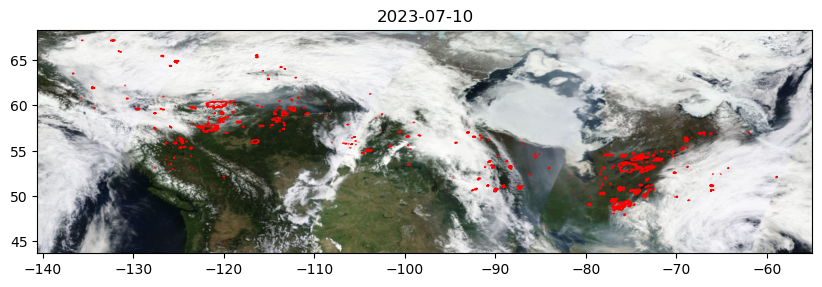

In [11]:
ax = snap.plot(figsize=(10, 10), facecolor="none", edgecolor="red")
cx.add_basemap(ax,
                crs=snap.crs.to_string(), #)#, 
                source= "https://map1.vis.earthdata.nasa.gov/wmts-webmerc/MODIS_Terra_CorrectedReflectance_TrueColor/default/2023-06-06/GoogleMapsCompatible_Level9/{z}/{y}/{x}.jpg")
                #crs=gdf.crs.to_string(), source=cx.providers.NASAGIBS.ModisTerraBands367CR) #  zoom = 10
ax.set_title(str(*snap.t.astype('str').unique()))
#plot.set_xlim(-83, -61)
#plot.set_ylim(45, 55)

In [53]:
### Get stuff in snapshot file format

## May 29th - June 8th
date_range = pd.date_range(start = "2023-05-31 12:00:00", end = "2023-06-10 00:00:00", freq="12H")
#date_range_format = datetime.strptime(date_rage, 
date_snap = date_range.strftime("%Y%m%d%p")
date_snap
nice_dates = date_range.strftime("%Y-%m-%d %p")

In [10]:
?cx.providers.NASAGIBS
#fv.prep_gdf(date = '20230601AM',layer='perimeter',handle_multi=False,only_lf=True,area_lim=4.7, year = "2023", path_region = "QuebecGlobalNRT")

Type:        Bunch
String form: {'ModisTerraTrueColorCR': {'url': 'https://map1.vis.earthdata.nasa.gov/wmts-webmerc/{variant}/def <...> </a>) with funding provided by NASA/HQ.', 'name': 'NASAGIBS.ASTER_GDEM_Greyscale_Shaded_Relief'}}
Length:      15
File:        ~/myenvs/fireatlas_oct4/lib/python3.8/site-packages/xyzservices/lib.py
Docstring:  
A dict with attribute-access

:class:`Bunch` is used to store :class:`TileProvider` objects.

Examples
--------
>>> black_and_white = TileProvider(
...     name="My black and white tiles",
...     url="https://myserver.com/bw/{z}/{x}/{y}",
...     attribution="(C) xyzservices",
... )
>>> colorful = TileProvider(
...     name="My colorful tiles",
...     url="https://myserver.com/color/{z}/{x}/{y}",
...     attribution="(C) xyzservices",
... )
>>> MyTiles = Bunch(BlackAndWhite=black_and_white, Colorful=colorful)
>>> MyTiles
{'BlackAndWhite': {'name': 'My black and white tiles', 'url': 'https://myserver.com/bw/{z}/{x}/{y}', 'attribution': '(C) xyz

20230531PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


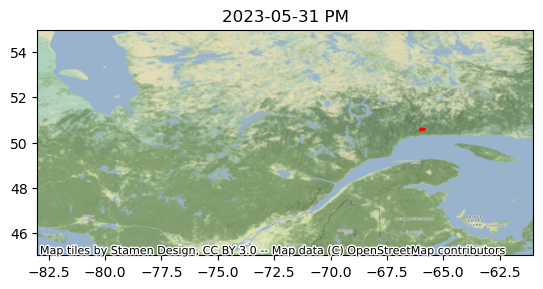

20230601AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


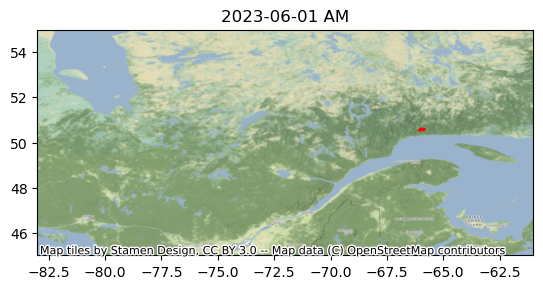

20230601PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


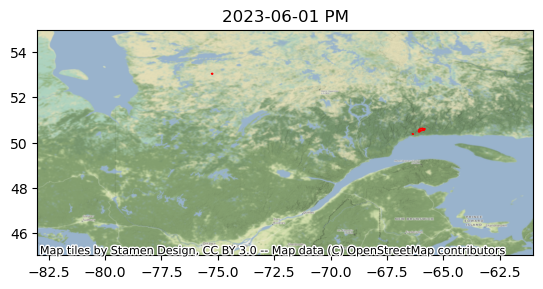

20230602AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


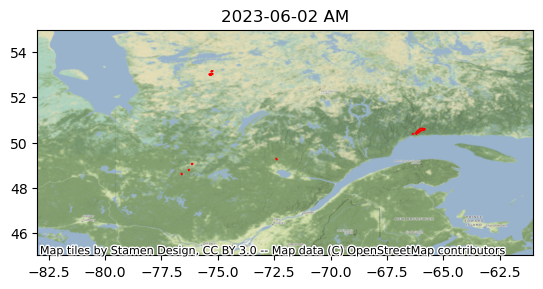

20230602PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


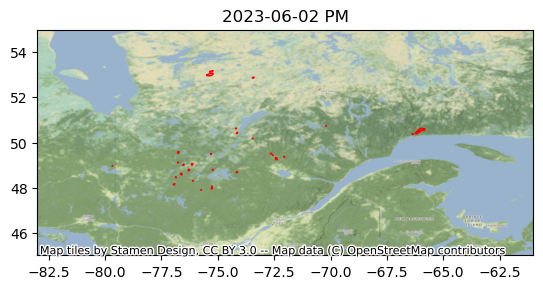

20230603AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


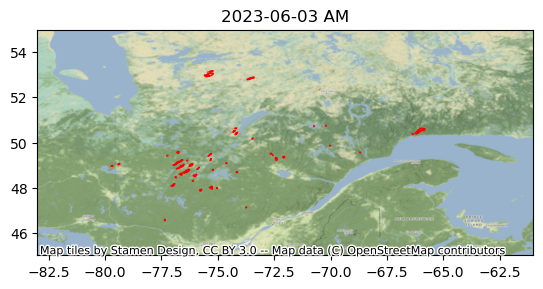

20230603PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


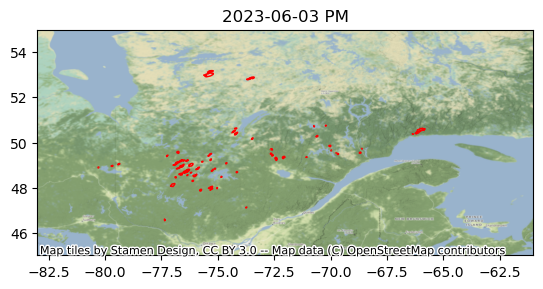

20230604AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


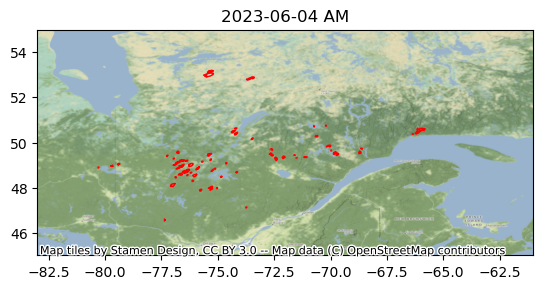

20230604PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


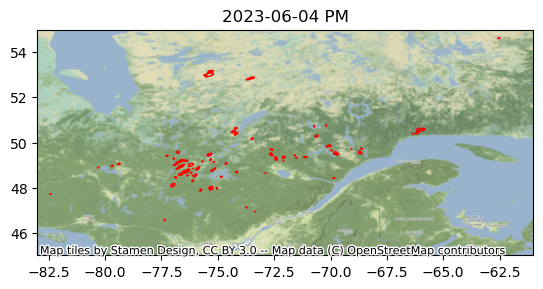

20230605AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


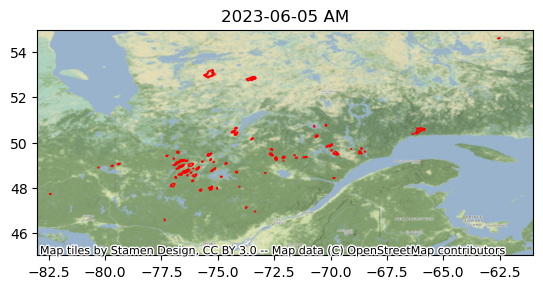

20230605PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


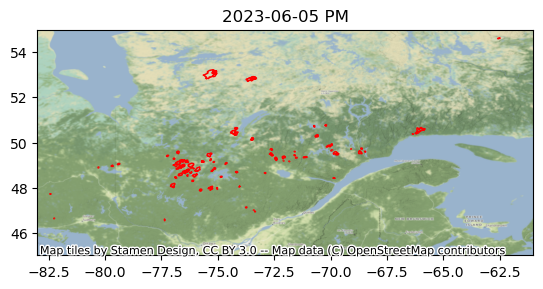

20230606AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


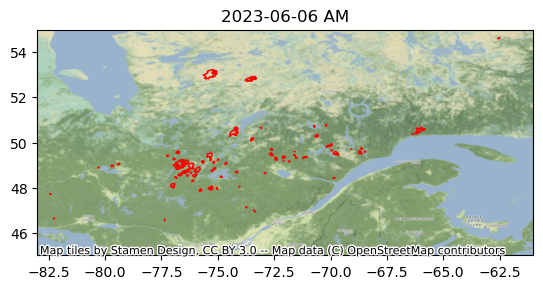

20230606PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


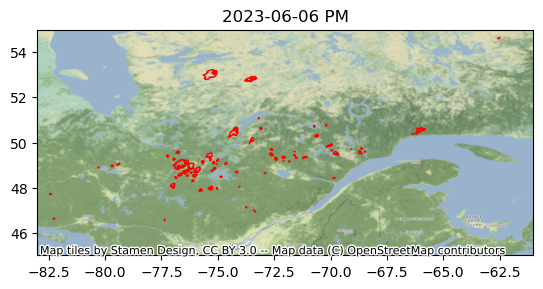

20230607AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


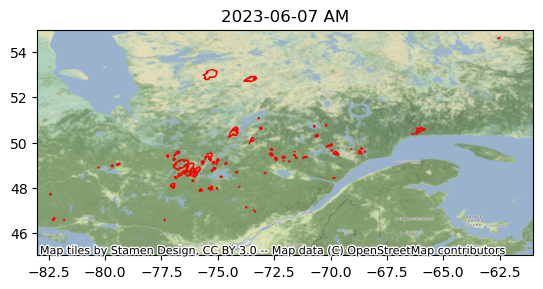

20230607PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


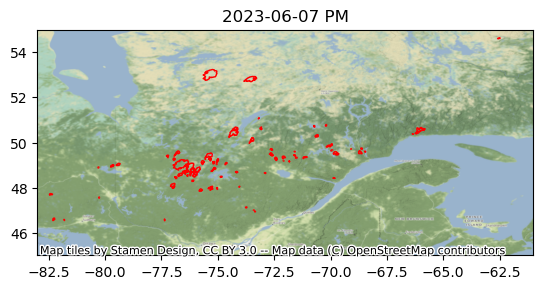

20230608AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


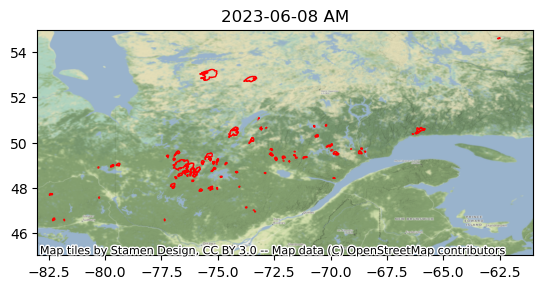

20230608PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


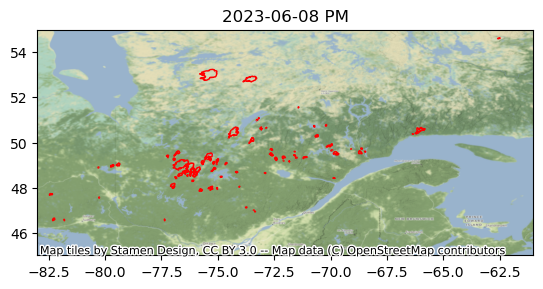

20230609AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


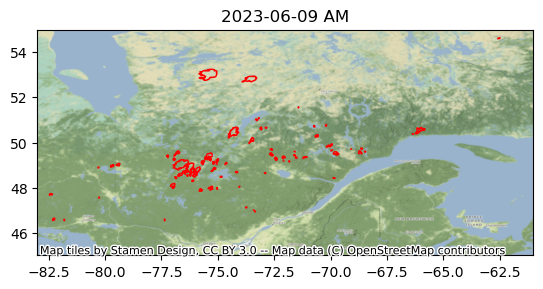

20230609PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


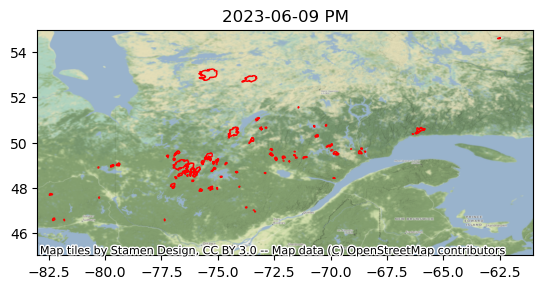

20230610AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


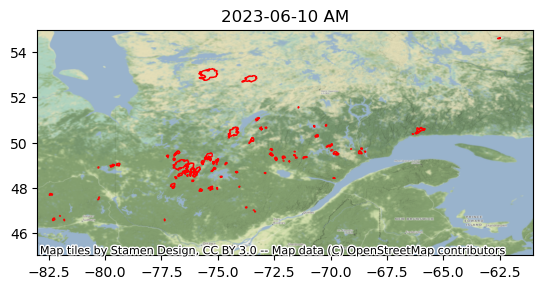

In [54]:
for d,n in zip(date_snap,nice_dates) :
    print(d)
    snap = fv.prep_gdf(date = d,layer='perimeter',handle_multi=False,only_lf=True,area_lim=4.7, year = "2023", path_region = "QuebecGlobalNRT_tess")
    plt.figure()
    # create subplot axes in a 3x3 grid
    ax = plt.subplot() # nrows, ncols, axes position
    # plot the continent on these axes
    plot = snap.plot(ax = ax, figsize=(45, 45), facecolor="none", edgecolor="red")
    #ax.set_extent([-83, -61, 45, 55], crs=gdf.crs.to_string())
    plot.set_xlim(-83, -61)
    plot.set_ylim(45, 55)
    cx.add_basemap(plot,
                crs=gdf.crs.to_string()) #source=cx.providers.NASAGIBS.ModisTerraTrueColorCR
    #txt = ax.texts[-1]
    #txt.set_position([0.99,0.98])
    #txt.set_ha('right')
    #txt.set_va('top')
    # set the title
    #timestamp = snap.t.astype('datetime64[ns]')
    ax.set_title(n)
    #plt.savefig('/projects/my-public-bucket/fire_weather_vis/base-fwi-vis/quebec/openstreet_quebec_snap_' + d +'.png', dpi=400)
    plt.show()
    
    

In [ ]:
import time
timestamp = snap.t.astype('str')
#timestamp[0].dt.hour()
tmp = timestamp.unique()
tmp[0]


In [ ]:
snap.plot()

In [ ]:
ax = gdf[gdf.t == '2023-06-07'].plot(figsize=(10, 10), alpha=0.2, edgecolor="black")
#cx.add_basemap(ax, source = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}')
cx.add_basemap(ax,
                crs=gdf.crs.to_string(),
               )

In [ ]:
?m.save

In [ ]:
# Test

In [4]:
## May 29th - June 8th
date_range = pd.date_range(start = "2023-06-01 12:00:00", end = "2023-06-15 00:00:00", freq="12H")
#date_range_format = datetime.strptime(date_rage, 
date_snap = date_range.strftime("%Y%m%d%p")
date_snap
nice_dates = date_range.strftime("%Y-%m-%d %p")



for d,n in zip(date_snap,nice_dates) :
    print(d)
    snap = fv.prep_gdf(date = d,layer='perimeter',handle_multi=False,only_lf=True,area_lim=4.7, year = "2023", path_region = "BOREAL_NRT_3571")
    snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")

20230601PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y
/tmp/ipykernel_9590/293477249.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")


20230602AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y
/tmp/ipykernel_9590/293477249.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")


20230602PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y
/tmp/ipykernel_9590/293477249.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")


20230603AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y
/tmp/ipykernel_9590/293477249.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")


20230603PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y
/tmp/ipykernel_9590/293477249.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")


20230604AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y
/tmp/ipykernel_9590/293477249.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")


20230604PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y
/tmp/ipykernel_9590/293477249.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")


20230605AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y
/tmp/ipykernel_9590/293477249.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")


20230605PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y
/tmp/ipykernel_9590/293477249.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")


20230606AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y
/tmp/ipykernel_9590/293477249.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")


20230606PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y
/tmp/ipykernel_9590/293477249.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")


20230607AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y
/tmp/ipykernel_9590/293477249.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")


20230607PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y
/tmp/ipykernel_9590/293477249.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")


20230608AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y
/tmp/ipykernel_9590/293477249.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")


20230608PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y
/tmp/ipykernel_9590/293477249.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")


20230609AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y
/tmp/ipykernel_9590/293477249.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")


20230609PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y
/tmp/ipykernel_9590/293477249.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")


20230610AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y
/tmp/ipykernel_9590/293477249.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")


20230610PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y
/tmp/ipykernel_9590/293477249.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")


20230611AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y
/tmp/ipykernel_9590/293477249.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")


20230611PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y
/tmp/ipykernel_9590/293477249.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")


20230612AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y
/tmp/ipykernel_9590/293477249.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")


20230612PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y
/tmp/ipykernel_9590/293477249.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")


20230613AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y
/tmp/ipykernel_9590/293477249.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")


20230613PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y
/tmp/ipykernel_9590/293477249.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")


20230614AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y
/tmp/ipykernel_9590/293477249.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")


20230614PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y
/tmp/ipykernel_9590/293477249.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")


20230615AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y
/tmp/ipykernel_9590/293477249.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/ESRI/data/quebec_gdf_export/" + d+ "_boreal_fire_perimeter.shp")
